## **Курсовая работа** | Изучаем пакет для обработки изображений image библиотеки tensorflow 
---



Установка и обновление библиотек(и)


In [ ]:
pip install tensorflow

Импортируем нужные библиотеки

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Функция для сохранения картинки

In [ ]:
def save_jpg_image(image, name):
  img_to_save = tf.image.convert_image_dtype(image, tf.uint8)  # encode_jpeg требует uint8
  img_to_save = tf.io.encode_jpeg(img_to_save)  # кодируем тензор в картинку

  # проверяем, корректно ли введено имя для файла
  if name.split(".")[-1] != "jpg":
    raise ValueError("Invalid file name. Correct form is '_.jpg'")

  tf.io.write_file(name, img_to_save)  # записываем 

Загрузка и сохранение картинки

In [ ]:
# img_path = "cat.jpg"  # если файл локальный
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')  # если файл из сети

img_file = tf.io.read_file(img_path)  

img = tf.io.decode_image(img_file)  # декодируем картинку в массив байтов
img = tf.image.convert_image_dtype(img, tf.float32)  # декодируем массив байтов в удобный для обработки tf тип

plt.imshow(img)  # строим картинку, как массив значений в matplotlib
plt.show()

save_jpg_image(img, "output1.jpg")

Изменение размера картинки

In [ ]:
resized = tf.image.resize(img, [500,500])  # 500x500

plt.imshow(resized)
plt.show()

Оттенки серого

In [ ]:
bw_img = tf.image.rgb_to_grayscale(img)

plt.imshow(bw_img[...,0], cmap='gray')
plt.colorbar()
plt.show()

Заполнение картинки отступами


In [ ]:
new_image = tf.image.pad_to_bounding_box(img, 100, 100, 2100, 2100)

plt.imshow(new_image)
plt.show()

Переворот картинки (или отзеркаливание)

In [ ]:
flipped = tf.image.flip_left_right(img)

plt.imshow(flipped)
plt.show()

Изменение насыщенности цветов

In [ ]:
saturated = tf.image.adjust_saturation(img, 0.3)

plt.imshow(saturated)
plt.show()

Изменение яркости

In [ ]:
bright = tf.image.adjust_brightness(img, 0.7)

plt.imshow(bright)
plt.show()

Обрезка изображения

In [ ]:
cropped = tf.image.central_crop(img, central_fraction=0.5)

plt.imshow(cropped)
plt.show()

Поворот изображения на 90 градусов

In [ ]:
rotated = tf.image.rot90(img)

plt.imshow(rotated)
plt.show()

## **Курсовая работа** | Программа с использованием TensorFlow и пакета Image

Напишем простой аугментатор

In [ ]:
class Augmentator:

    @staticmethod
    def open_image(img_path):
        img_file = tf.io.read_file(img_path)
        img = tf.io.decode_image(img_file)
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img

    @staticmethod
    def augment_dataset(pictures: list) -> list:
        output = []

        for pic in pictures:
            output.append(pic)

            resized = tf.image.resize(pic, [500, 500])  # 500x500
            output.append(resized)

            pad_img = tf.image.pad_to_bounding_box(resized, 100, 100, 700, 700)
            output.append(pad_img)

            flipped = tf.image.flip_left_right(pic)
            output.append(flipped)

            saturated = tf.image.adjust_saturation(pic, 0.3)
            output.append(saturated)

            cropped = tf.image.central_crop(pic, central_fraction=0.5)
            output.append(cropped)

            rotated = tf.image.rot90(pic)
            output.append(rotated)
            
        return output


Проведем аугментацию двух картинок

In [ ]:
augmentator = Augmentator()

img1 = augmentator.open_image("cat.jpg")
img2 = augmentator.open_image("car.jpg")
lst = augmentator.augment_dataset([img1, img2])

for pic in lst:
    plt.imshow(pic)
    plt.show()  


## **TensorFlow Addons (tfa)** (дополнительная библиотека для работы с изображениями)

In [ ]:
pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.2 MB/s 


In [ ]:
import tensorflow_addons as tfa


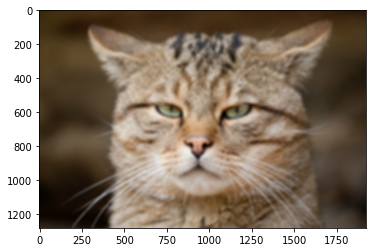

In [ ]:
mean = tfa.image.mean_filter2d(img, filter_shape=20)

plt.imshow(mean)
plt.show()

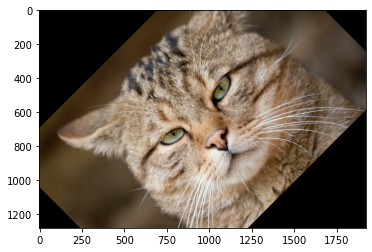

In [ ]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/4))

plt.imshow(rotate)
plt.show()

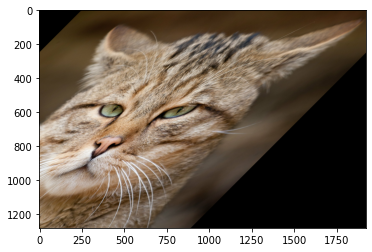

In [ ]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])

plt.imshow(transform)
plt.show()

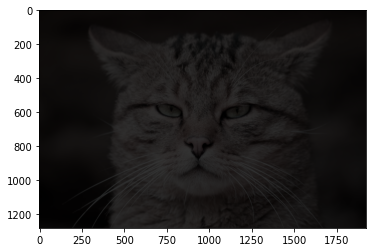

In [ ]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8

rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)

plt.imshow(rand_hsvinyiq)
plt.show()

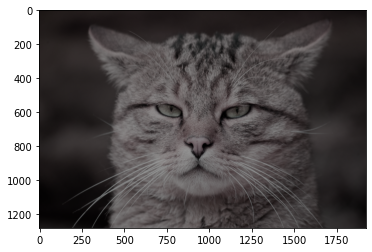

In [ ]:
delta = 0.5
saturation = 0.3
value = 0.6

adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)

plt.imshow(adj_hsvinyiq)
plt.show()

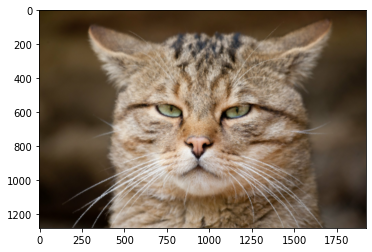

In [ ]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)

flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)

plt.imshow(dense_img_warp)
plt.show()